In [227]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import numpy as np
import random

font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [228]:
df_21 = pd.read_csv('./analyze_susung_22_21.csv')
df_22 = pd.read_csv('./analyze_susung_22.csv')

df_22.drop('Unnamed: 0', axis=1, inplace=True)
df_21.drop('Unnamed: 0', axis=1, inplace=True)

df_21.set_index('매장명', inplace=True)
df_22.set_index('매장명', inplace=True)

sr = df_21['인접_상가수']
sr.rename('인접_상가수_21', inplace=True)

df = pd.concat([df_22, sr], axis=1, join='outer')
df
list_ = ['위도', '경도',  '인접_상가수_21', '인접_상가수', '인접_학교수', '인접_지하철역수', '하루평균유동인구_지하철', '인접_버스정류장수', '하루평균유동인구_버스', '하루평균유동인구_대중교통']
df = df[list_]

df.columns = ['위도', '경도',  '인접_상가수_21', '인접_상가수_22', '인접_학교수', '인접_지하철역수', '하루평균유동인구_지하철', '인접_버스정류장수', '하루평균유동인구_버스', '하루평균유동인구_대중교통']
df.fillna(0, inplace=True)

df.reset_index(inplace=True)
df

,매장명,위도,경도,인접_상가수_21,인접_상가수_22,인접_학교수,인접_지하철역수,하루평균유동인구_지하철,인접_버스정류장수,하루평균유동인구_버스,하루평균유동인구_대중교통
0,대구수성도서관DT,35.873059,128.638985,436,371,5,0,0.00,7,400.85,400.85
1,대구그랜드호텔R,35.857871,128.625094,370,408,6,1,13055.82,2,409.14,13464.96
2,국립대구박물관DT,35.845491,128.639059,55,38,8,0,0.00,5,279.11,279.11
3,대구수성호수R,35.826126,128.615912,15,23,3,0,0.00,2,28.42,28.42
4,대구수성동,35.853776,128.620304,246,301,6,2,7848.90,3,208.99,8057.89
5,대구수성네거리DT,35.860580,128.617977,167,268,12,1,10357.11,5,205.35,10562.46
6,대구중동DT,35.847384,128.612529,193,249,6,0,0.00,6,100.05,100.05
7,대구중동네거리DT,35.840917,128.613963,252,247,6,0,0.00,8,296.81,296.81
8,대구상동DT,35.829642,128.611693,149,185,4,0,0.00,3,41.33,41.33
9,대구황금DT,35.839069,128.625797,195,249,8,1,5360.12,4,261.45,5621.57


In [229]:
melt_df = df.copy()
melt_df.columns = ['매장명', '위도', '경도', '2021', '2022', '인접_학교수', '인접_지하철역수', '하루평균유동인구_지하철', '인접_버스정류장수', '하루평균유동인구_버스', '하루평균유동인구_대중교통']

melt_df = melt_df.melt(id_vars='매장명', value_vars=['2021', '2022'], var_name='year', value_name='인접 상가수')
melt_df.head(5)

,매장명,year,인접 상가수
0,대구수성도서관DT,2021,436
1,대구그랜드호텔R,2021,370
2,국립대구박물관DT,2021,55
3,대구수성호수R,2021,15
4,대구수성동,2021,246


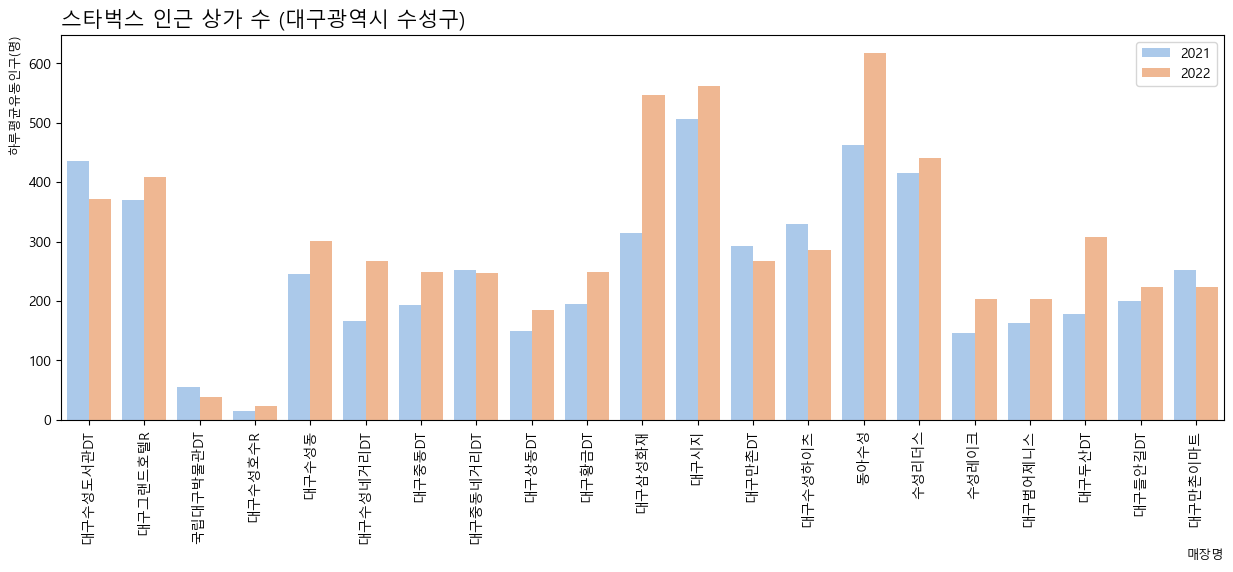

In [230]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(1,1,1)

sns.barplot(melt_df, x='매장명', y='인접 상가수', hue='year', palette='pastel', ax=ax1)

plt.title('스타벅스 인근 상가 수 (대구광역시 수성구)', fontsize=15, loc='left')
plt.xticks(rotation=90)
ax1.set_xlabel('매장명', loc='right', fontsize=9)
ax1.set_ylabel('하루평균유동인구(명)', loc='top', fontsize=9)
ax1.legend(loc='upper right', fontsize=10)


In [231]:
melt_df2 = df.copy()
melt_df2.columns = ['매장명', '위도', '경도', '2021', '2022', '인접_학교수', '인접_지하철역수', '지하철', '인접_버스정류장수', '버스', '버스+지하철']

melt_df2 = melt_df2.melt(id_vars=['매장명'], value_vars=['버스', '지하철', '버스+지하철'], var_name='transport', value_name='인접 역 수')
melt_df2

,매장명,transport,인접 역 수
0,대구수성도서관DT,버스,400.85
1,대구그랜드호텔R,버스,409.14
2,국립대구박물관DT,버스,279.11
3,대구수성호수R,버스,28.42
4,대구수성동,버스,208.99
...,...,...,...
58,수성레이크,버스+지하철,60.64
59,대구범어제니스,버스+지하철,13362.70
60,대구두산DT,버스+지하철,74.50
61,대구들안길DT,버스+지하철,68.59


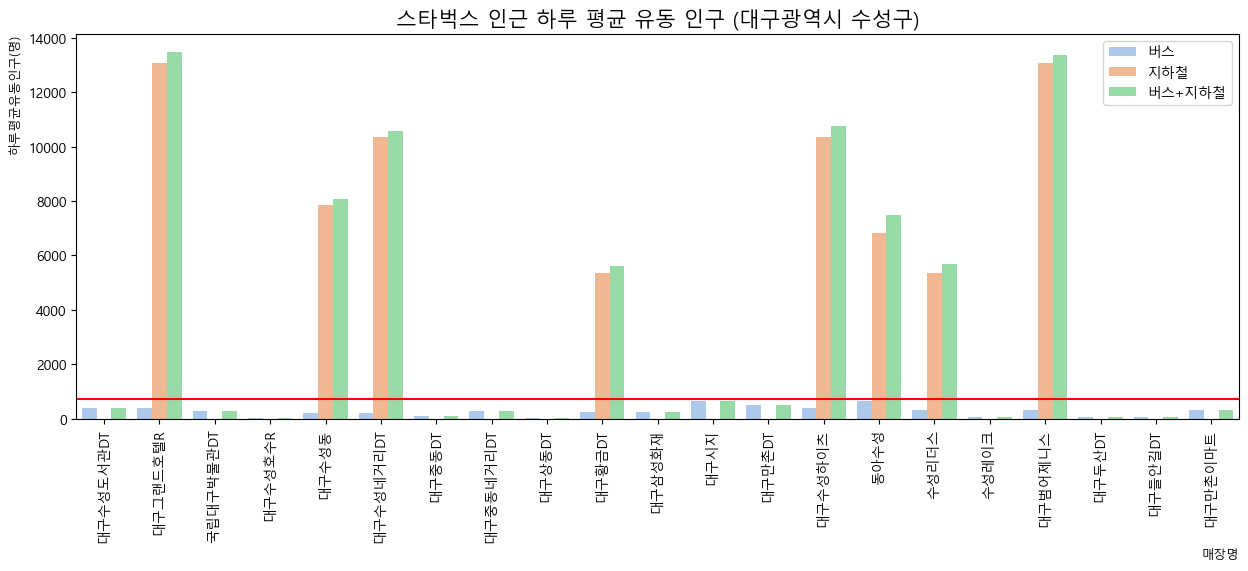

In [291]:
fig2 = plt.figure(figsize=(15,5))
ax2 = fig2.add_subplot(1,1,1)

sns.barplot(melt_df2, x='매장명', y='인접 역 수', hue='transport', palette='pastel', ax=ax2)

plt.title('스타벅스 인근 하루 평균 유동 인구 (대구광역시 수성구)', fontsize=15, loc='center')
plt.axhline(y=729, color='red')
plt.xticks(rotation=90)
ax2.set_xlabel('매장명', loc='right', fontsize=9)
ax2.set_ylabel('하루평균유동인구(명)', loc='top', fontsize=9)
ax2.legend(loc='upper right', fontsize=10)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


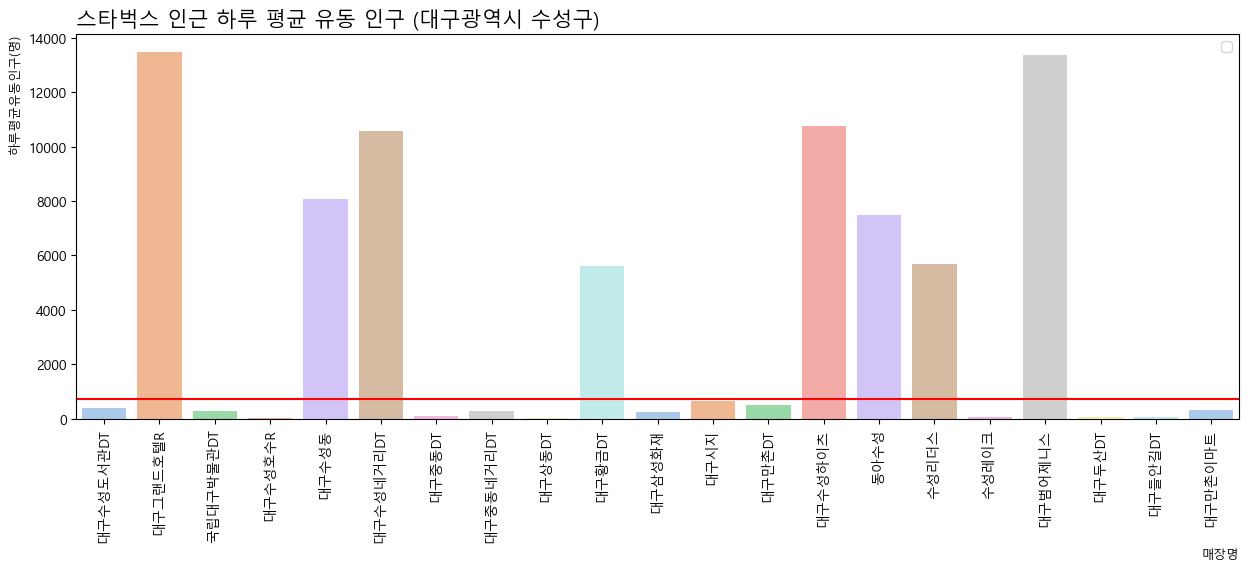

In [292]:
fig3 = plt.figure(figsize=(15,5))
ax3 = fig3.add_subplot(1,1,1)

sns.barplot(df, x='매장명', y='하루평균유동인구_대중교통', palette='pastel', ax=ax3)

plt.title('스타벅스 인근 하루 평균 유동 인구 (대구광역시 수성구)', fontsize=15, loc='left')
plt.xticks(rotation=90)
plt.axhline(y=729, color='red')
ax3.set_xlabel('매장명', loc='right', fontsize=9)
ax3.set_ylabel('하루평균유동인구(명)', loc='top', fontsize=9)
ax3.legend(loc='upper right', fontsize=10)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


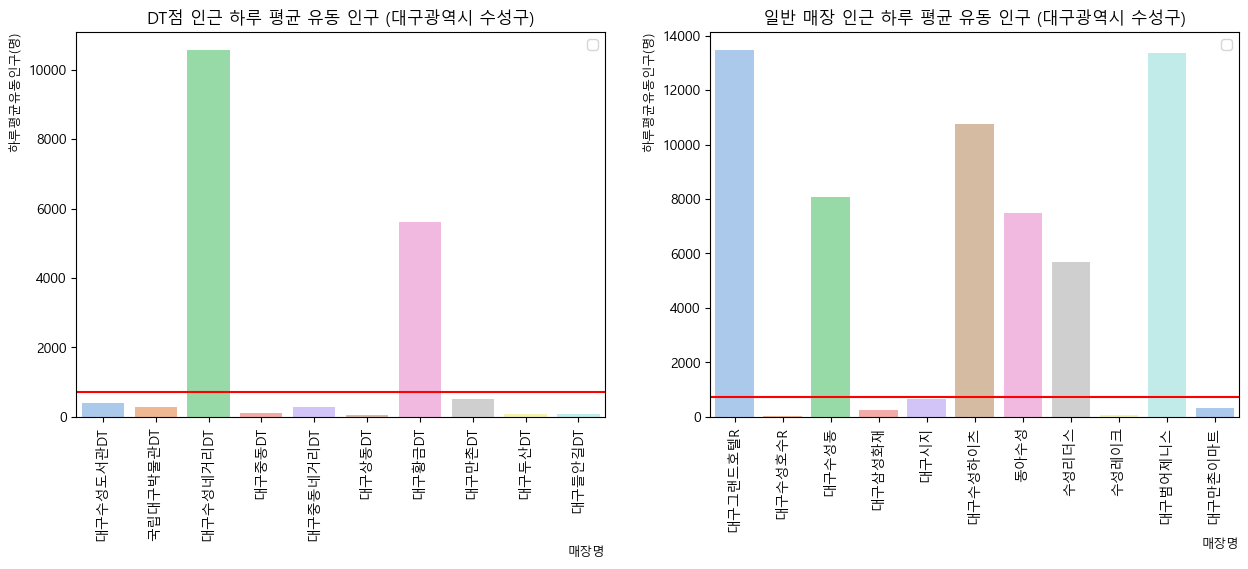

In [293]:
mask = df['매장명'].str.contains('DT')

df_DT = df[mask]
df_notDT = df[~mask]


fig4 = plt.figure(figsize=(15,5))
ax4 = fig4.add_subplot(1,2,1)
ax5 = fig4.add_subplot(1,2,2)

sns.barplot(df_DT, x='매장명', y='하루평균유동인구_대중교통', palette='pastel', ax=ax4)
sns.barplot(df_notDT, x='매장명', y='하루평균유동인구_대중교통', palette='pastel', ax=ax5)

ax4.set_title('DT점 인근 하루 평균 유동 인구 (대구광역시 수성구)', fontsize=12, loc='center')
ax4.axhline(y=729, color='red')
ax4.set_xticklabels(labels=df_DT['매장명'].to_list(), rotation=90)
ax4.set_xlabel('매장명', loc='right', fontsize=9)
ax4.set_ylabel('하루평균유동인구(명)', loc='top', fontsize=9)
ax4.legend(loc='upper right', fontsize=10)

ax5.set_title('일반 매장 인근 하루 평균 유동 인구 (대구광역시 수성구)', fontsize=12, loc='center')
ax5.axhline(y=729, color='red')
ax5.set_xticklabels(labels=df_notDT['매장명'].to_list(), rotation=90)
ax5.set_xlabel('매장명', loc='right', fontsize=9)
ax5.set_ylabel('하루평균유동인구(명)', loc='top', fontsize=9)
ax5.legend(loc='upper right', fontsize=10)


In [273]:
df_DT['하루평균유동인구_대중교통'].describe()

count       10.000000
mean      1794.616000
std       3520.743099
min         41.330000
25%         80.887500
50%        287.960000
75%        475.880000
max      10562.460000
Name: 하루평균유동인구_대중교통, dtype: float64

In [270]:
df_notDT['하루평균유동인구_대중교통'].describe()

count       11.000000
mean      5467.933636
std       5483.271431
min         28.420000
25%        295.870000
50%       5668.420000
75%       9409.550000
max      13464.960000
Name: 하루평균유동인구_대중교통, dtype: float64

In [279]:
df_result = pd.concat([df_DT['하루평균유동인구_대중교통'].describe(),df_notDT['하루평균유동인구_대중교통'].describe()], axis=1)

df_result.columns = ['DT점','NotDT점']
df_result

,DT점,NotDT점
count,10.000000,11.000000
mean,1794.616000,5467.933636
std,3520.743099,5483.271431
min,41.330000,28.420000
25%,80.887500,295.870000
50%,287.960000,5668.420000
75%,475.880000,9409.550000
max,10562.460000,13464.960000


- 특이점이 보이는 자료:

1. DT점이 평균 유동 인구가 적음
2. 수성호수점, 수성레이크점의 교통이 상당히 불편, 주차장도 불편, 차타고 가는 사람이 적을 가능성이 있음 (주차장 위치)
3. 대구삼성화재,아마트점 : 회사 안, 마트 안 